In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_formats = ['svg']

In [158]:
df = pd.read_csv('mice_data.csv')

In [159]:
df.head()

,Diet,Bodyweight,Size
0,chow,21.51,16.599928
1,chow,28.14,22.194796
2,chow,24.04,17.505866
3,chow,23.45,17.360517
4,chow,23.68,17.142089


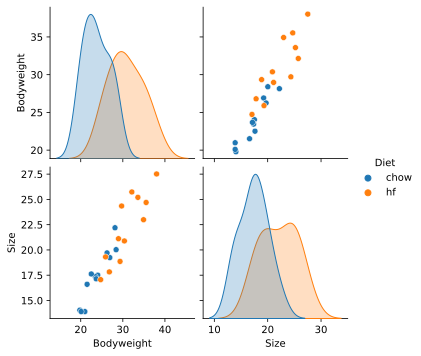

In [160]:
sns.pairplot(df, hue='Diet')

In [161]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df.Bodyweight.values.reshape(-1, 1), df.Size.values)

LinearRegression()

In [162]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print('coefficient of determination:', model.score(df.Bodyweight.values.reshape(-1, 1), df.Size.values))


intercept: 0.30044601228598466
slope: [0.71300393]
coefficient of determination: 0.8784745185701885


<AxesSubplot:xlabel='Bodyweight', ylabel='Size'>

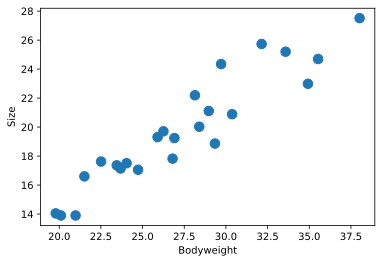

In [164]:
df.plot(kind='scatter', x='Bodyweight',y='Size', s=90)

<AxesSubplot:xlabel='Bodyweight', ylabel='Size'>

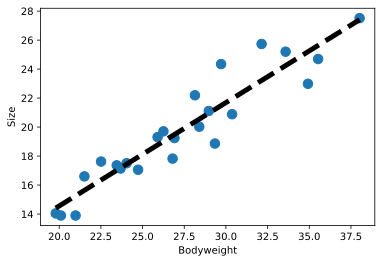

In [163]:
fig, ax = plt.subplots()

x = np.linspace(df.Bodyweight.min(), df.Bodyweight.max())
y = model.coef_*x + model.intercept_

ax.plot(x,y, 'k--', linewidth=5)
df.plot(kind='scatter', x='Bodyweight',y='Size', s=90,ax=ax)

<AxesSubplot:xlabel='Bodyweight', ylabel='Diet'>

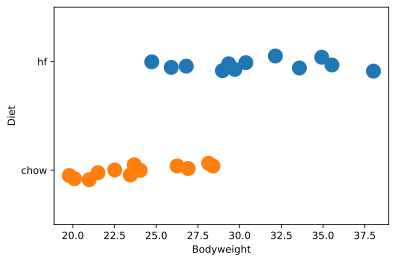

In [165]:
sns.stripplot(x='Bodyweight', y='Diet', data=df.sort_values(by='Diet', ascending=False), s=15)

<AxesSubplot:xlabel='Bodyweight', ylabel='Diet'>

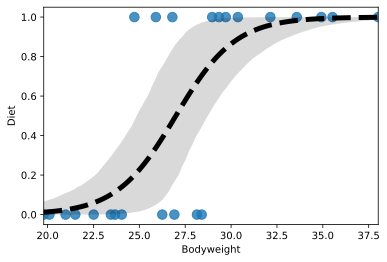

In [175]:
aux = df.copy()
aux.Diet = aux.Diet.map({'hf':1,'chow':0})

sns.regplot(x='Bodyweight', y='Diet', data=aux, logistic=True, 
            scatter_kws={"s": 90}, 
            line_kws={'color':'k','linewidth':5,'linestyle':'--'})

# sns.stripplot(x='Bodyweight', y='Diet', data=aux.sort_values(by='Diet', ascending=False), s=15)

In [156]:
aux.Diet = aux.Diet.map({1:'hf',0:'chow'})
aux.Size = 0.7*aux.Bodyweight + 0.8 + np.random.normal(0,1.1,aux.shape[0])

In [157]:
# aux
aux.to_csv('mice_data.csv',index=False)